In [40]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras import optimizers  

import numpy as np 
import matplotlib.pyplot as plt   


In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   )

In [42]:
!pwd

/home/aquila/dev_ws/DeepLearning/src


In [43]:
train_generator = train_datagen.flow_from_directory(
    '../data/Alzheimer/data-ch20-master/train',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [44]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    '../data/Alzheimer/data-ch20-master/test',
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'binary')

Found 120 images belonging to 2 classes.


In [45]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_19 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 activation_20 (Activation)  (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                

In [46]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.0002),
              metrics = ['accuracy'])

In [47]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 10
)

Epoch 1/100
32/32 [==============================] - 2s 26ms/step - loss: 0.7028 - accuracy: 0.4500 - val_loss: 0.6821 - val_accuracy: 0.5800
Epoch 2/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6998 - accuracy: 0.4500 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.6907 - accuracy: 0.5312 - val_loss: 0.6823 - val_accuracy: 0.5800
Epoch 4/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6861 - accuracy: 0.5750 - val_loss: 0.6789 - val_accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6765 - accuracy: 0.5625 - val_loss: 0.6652 - val_accuracy: 0.7200
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6830 - accuracy: 0.5375 - val_loss: 0.6581 - val_accuracy: 0.5800
Epoch 7/100
32/32 [==============================] - 1s 23ms/step - loss: 0.6881 - accuracy: 0.5688 - val_loss: 0.6593 - val_accuracy: 0.6800
Epoch 

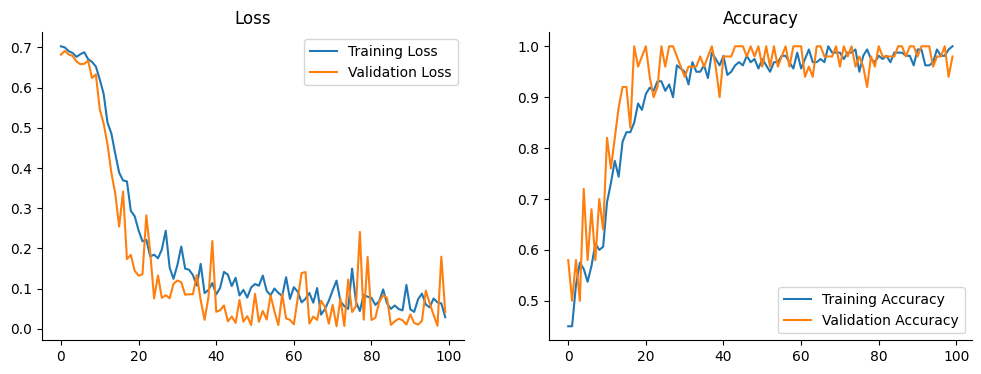

In [48]:
import matplotlib.pyplot as plt  
import seaborn as sns  

fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["loss"], ax = axes[0],
             label = 'Training Loss')
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["val_loss"], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"], ax = axes[1],
             label = 'Training Accuracy')
sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["val_accuracy"], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title("Loss"); axes[1].set_title('Accuracy')

sns.despine()
plt.show()

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics  
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16  
from tensorflow.keras.callbacks import EarlyStopping  
import numpy as np 
import matplotlib.pyplot as plt   

In [50]:
transfer_model = VGG16(weights = 'imagenet', include_top = False,
                       input_shape = (150, 150, 3))
transfer_model.trainable = False  
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [51]:
finetunemodel = models.Sequential()
finetunemodel.add(transfer_model)
finetunemodel.add(Flatten())
finetunemodel.add(Dense(64))
finetunemodel.add(Activation('relu'))
finetunemodel.add(Dropout(0.5))
finetunemodel.add(Dense(1))
finetunemodel.add(Activation('sigmoid'))
finetunemodel.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                524352    
                                                                 
 activation_24 (Activation)  (None, 64)                0         
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
 activation_25 (Activation)  (None, 1)                

In [52]:
finetunemodel.compile(loss = 'binary_crossentropy',
                       optimizer = optimizers.Adam(learning_rate = 0.002),
                       metrics = ['accuracy'])

history = finetunemodel.fit(
    train_generator,
    epochs = 20,
    validation_data = test_generator,
    validation_steps = 10
)

Epoch 1/20
32/32 [==============================] - 2s 32ms/step - loss: 0.9319 - accuracy: 0.5625 - val_loss: 0.5578 - val_accuracy: 0.6800
Epoch 2/20
32/32 [==============================] - 1s 25ms/step - loss: 0.5560 - accuracy: 0.6687 - val_loss: 0.5058 - val_accuracy: 0.8600
Epoch 3/20
32/32 [==============================] - 1s 25ms/step - loss: 0.5548 - accuracy: 0.6750 - val_loss: 0.4669 - val_accuracy: 0.9000
Epoch 4/20
32/32 [==============================] - 1s 25ms/step - loss: 0.5546 - accuracy: 0.6750 - val_loss: 0.5635 - val_accuracy: 0.6600
Epoch 5/20
32/32 [==============================] - 1s 25ms/step - loss: 0.6111 - accuracy: 0.5562 - val_loss: 0.5750 - val_accuracy: 0.6400
Epoch 6/20
32/32 [==============================] - 1s 25ms/step - loss: 0.5211 - accuracy: 0.6812 - val_loss: 0.4635 - val_accuracy: 0.7400
Epoch 7/20
32/32 [==============================] - 1s 24ms/step - loss: 0.4122 - accuracy: 0.6938 - val_loss: 0.3429 - val_accuracy: 0.8600
Epoch 8/20
32

In [53]:
!pip install seaborn

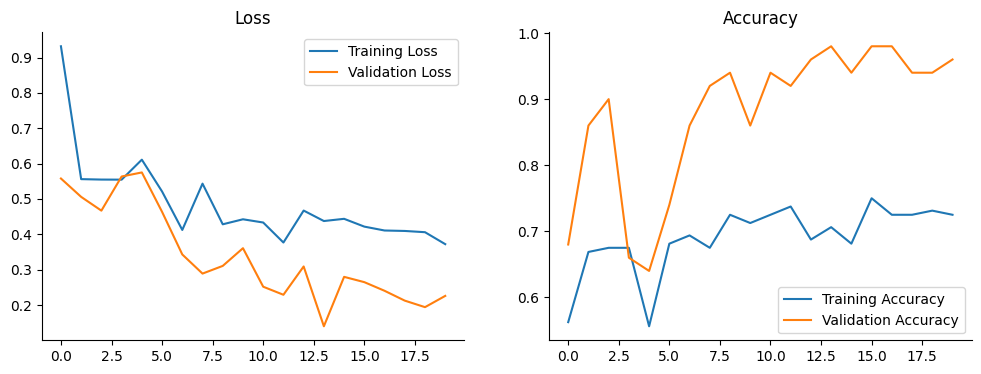

In [54]:
import matplotlib.pyplot as plt  
import seaborn as sns  

fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["loss"], ax = axes[0],
             label = 'Training Loss')
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["val_loss"], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"], ax = axes[1],
             label = 'Training Accuracy')
sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["val_accuracy"], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title("Loss"); axes[1].set_title('Accuracy')

sns.despine()
plt.show()